In [1]:
import numpy as nm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv('Chrun_data.csv')
data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [41]:
raw_data=data.copy

In [43]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [45]:
shape_info=pd.DataFrame({"metric":["Row","Columns"],
                          "Value":[data.shape[0],data.shape[1]] })

In [47]:
shape_info

,metric,Value
0,Row,7043
1,Columns,21


In [51]:
dtype_tbl = pd.DataFrame({
    "Column": data.columns,
    "dtype": data.dtypes.astype(str).values
}).sort_values("Column")


In [52]:
dtype_tbl

,Column,dtype
20,Churn,object
15,Contract,object
4,Dependents,object
11,DeviceProtection,object
8,InternetService,object
18,MonthlyCharges,float64
7,MultipleLines,object
10,OnlineBackup,object
9,OnlineSecurity,object
16,PaperlessBilling,object


In [58]:
na_counts = data.isna().sum()
na_pct = (na_counts / len(data) * 100).round(2)
na_tbl = pd.DataFrame({"column": data.columns, "missing_count": na_counts.values, "missing_%": na_pct.values})
na_tbl.sort_values("missing_count", ascending=False)

,column,missing_count,missing_%
0,customerID,0,0.0
11,DeviceProtection,0,0.0
19,TotalCharges,0,0.0
18,MonthlyCharges,0,0.0
17,PaymentMethod,0,0.0
16,PaperlessBilling,0,0.0
15,Contract,0,0.0
14,StreamingMovies,0,0.0
13,StreamingTV,0,0.0
12,TechSupport,0,0.0


In [69]:
full_dup_count=data.duplicated().sum()

In [63]:
dup_customerid_count = nm.nan
if "customerID" in data.columns:
    dup_customerid_count = data.duplicated(subset=["customerID"]).sum()

dup_customerid_count

0

In [71]:
dup_summary = pd.DataFrame(
    {
        "check": ["Full-row duplicates", "Duplicate customerID"],
        "count": [full_dup_count, dup_customerid_count],
    })


In [73]:
dup_summary

,check,count
0,Full-row duplicates,0
1,Duplicate customerID,0


In [75]:
obj_cols = data.select_dtypes(include="object").columns.tolist()
for col in obj_cols:
    data[col] = data[col].astype(str).str.strip()


In [78]:
converted_report = {}
if "TotalCharges" in data.columns:
    before_nan = data["TotalCharges"].isna().sum()
    # coerce to numeric (spaces/invalid -> NaN)
    data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
    after_coerce_nan = data["TotalCharges"].isna().sum()
    # fill with median
    median_tc = data["TotalCharges"].median()
    data["TotalCharges"] = data["TotalCharges"].fillna(median_tc)
    converted_report = {
        "before_nan_TotalCharges": before_nan,
        "after_coerce_nan_TotalCharges": after_coerce_nan,
        "median_used_for_fill": float(median_tc),
        "filled_nan_count": int(after_coerce_nan),
    }

In [80]:
clean_report_tbl = pd.DataFrame(
    {
        "metric": list(converted_report.keys()) if converted_report else ["note"],
        "value": list(converted_report.values()) if converted_report else ["No TotalCharges column to convert"],
    }
 )
clean_report_tbl


,metric,value
0,before_nan_TotalCharges,0.000
1,after_coerce_nan_TotalCharges,0.000
2,median_used_for_fill,1397.475
3,filled_nan_count,0.000


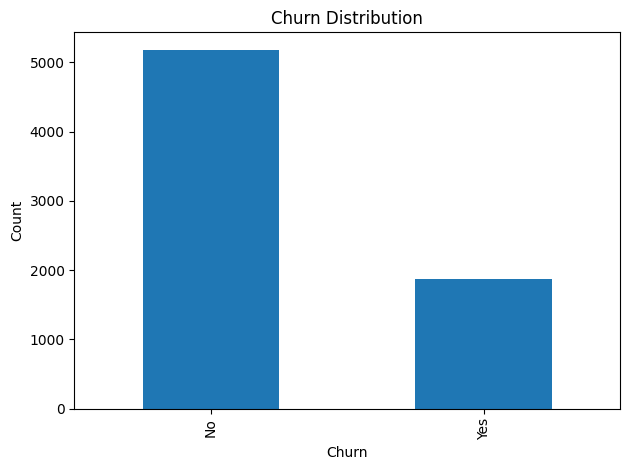

In [82]:
if "Churn" in data.columns:
    churn_counts = data["Churn"].value_counts(dropna=False).rename_axis("Churn").reset_index(name="count")
    churn_counts["percent"] = (churn_counts["count"] / len(data) * 100).round(2)

churn_counts

    # Bar chart
plt.figure()
churn_counts_plot = data["Churn"].value_counts()
churn_counts_plot.plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

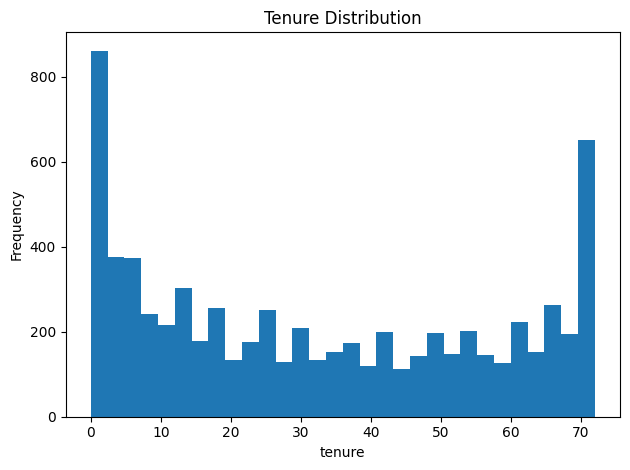

In [84]:
if "tenure" in data.columns:
    plt.figure()
    data["tenure"].dropna().plot(kind="hist", bins=30)
    plt.title("Tenure Distribution")
    plt.xlabel("tenure")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

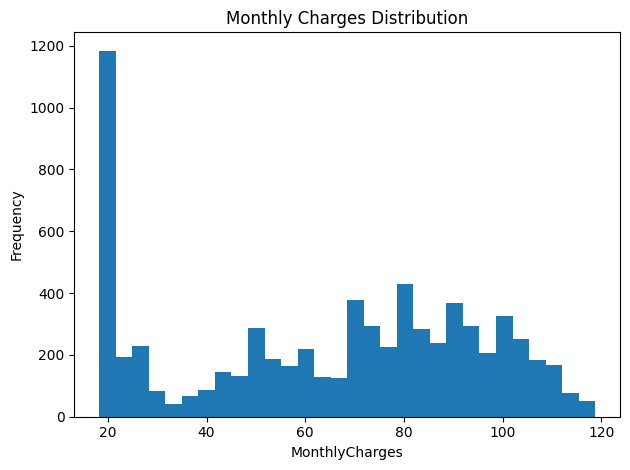

In [86]:
if "MonthlyCharges" in data.columns:
    plt.figure()
    data["MonthlyCharges"].dropna().plot(kind="hist", bins=30)
    plt.title("Monthly Charges Distribution")
    plt.xlabel("MonthlyCharges")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


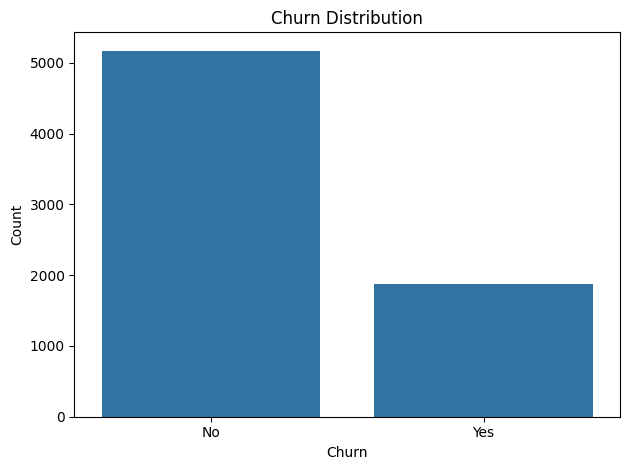

In [88]:
# STEP 6: Churn Distribution (Target variable)
# -----------------------------
plt.figure()
sns.countplot(x="Churn", data=data)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


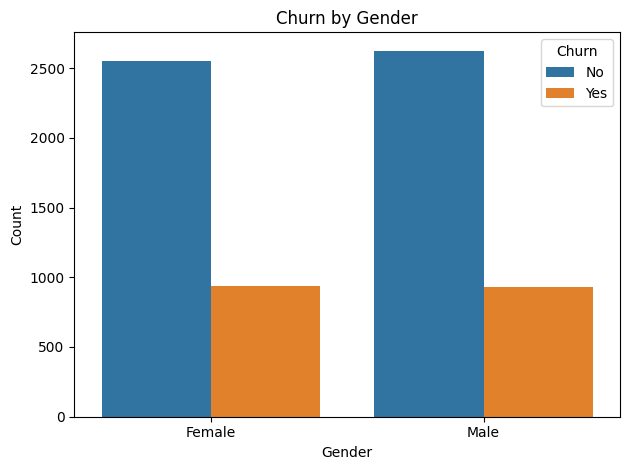

In [91]:
# sTEP 7: Churn vs Gender
# -----------------------------
plt.figure()
sns.countplot(x="gender", hue="Churn", data=data)
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


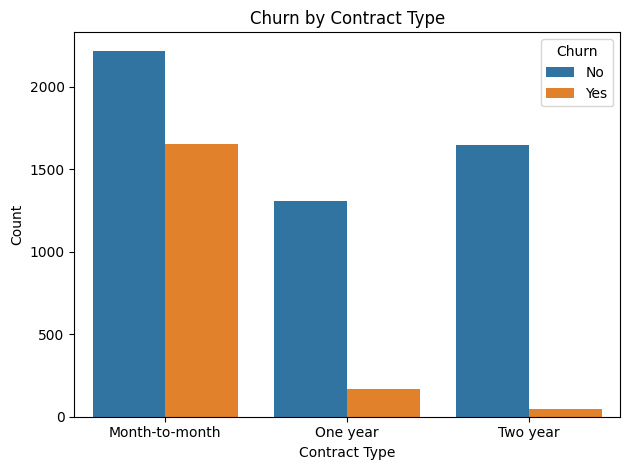

In [92]:
# STEP 8: Churn vs Contract Type
plt.figure()
sns.countplot(x="Contract", hue="Churn", data=data)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()